# Inclusion financière en Afrique

## 0. Préalable

Importation des bibliothèques de base

In [1]:
# analyse de données
import numpy as np
import pandas as pd
# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Chargement du jeu de données

In [2]:
train_set = pd.read_csv('data/Train.csv') # ensemble d'apprentissage
test_set = pd.read_csv('data/Test.csv') # ensemble de test
train_set.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
18766,Tanzania,2017,uniqueid_3964,No,Rural,Yes,2,35,Male,Head of Household,Single/Never Married,Tertiary education,Self employed
23119,Uganda,2018,uniqueid_1697,No,Rural,No,4,32,Female,Spouse,Married/Living together,Secondary education,Self employed
5109,Kenya,2018,uniqueid_5110,No,Rural,No,1,45,Male,Head of Household,Divorced/Seperated,Primary education,Informally employed
5948,Kenya,2018,uniqueid_5949,No,Rural,Yes,2,61,Female,Head of Household,Widowed,Primary education,Farming and Fishing
7468,Rwanda,2016,uniqueid_1401,No,Rural,No,4,40,Female,Child,Single/Never Married,Primary education,Informally employed


## 1. Analyse exploratoire

### 1.1. Analyse de la forme

La target de notre dataset est la variable **bank_account**.

Dimension du dataset

In [3]:
# Let’s observe the shape of our datasets.
print('Dimension du train set :', train_set.shape)
print('Dimension du test set :', test_set.shape)

Dimension du train set : (23524, 13)
Dimension du test set : (10086, 12)


Types des variables

In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Ce dataset comporte **3 variables quantitatives** et **10 variables qualitatives**.

Analyse des variables qualitatives

In [5]:
train_set.select_dtypes(include='object').describe()

,country,uniqueid,bank_account,location_type,cellphone_access,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524,23524,23524,23524,23524,23524,23524,23524,23524
unique,4,8735,2,2,2,2,6,5,6,10
top,Rwanda,uniqueid_1,No,Rural,Yes,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,4,20212,14343,17454,13877,12831,10749,12791,6437


In [6]:
for colonne in list(train_set.columns):
    print(colonne)
    print(train_set[colonne].value_counts(), '\n')

country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64 

year
2016    8735
2018    8169
2017    6620
Name: year, dtype: int64 

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: uniqueid, Length: 8735, dtype: int64 

bank_account
No     20212
Yes     3312
Name: bank_account, dtype: int64 

location_type
Rural    14343
Urban     9181
Name: location_type, dtype: int64 

cellphone_access
Yes    17454
No      6070
Name: cellphone_access, dtype: int64 

household_size
2     5229
3     3920
4     3474
1     3057
5     2853
6     2096
7     1400
8      751
9      363
10     190
11      69
12      68
13      25
15      11
14      10
16       4
21       1
18       1
17       1
20       1
Name: household_size, dtype: int64 

age_of_respondent
30     1056
35      836
25      79

Analyse des variables quantitatives

In [7]:
train_set.select_dtypes(include='number').describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Analyse des données manquantes

In [8]:
train_set.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

Super ! Notre dataset ne contient aucune donnée manquante.

Il n'y a aucun outlier dans ce dataset.

### 1.2. Analyse du fond

Analyse et visualisation de la target (bank_account)

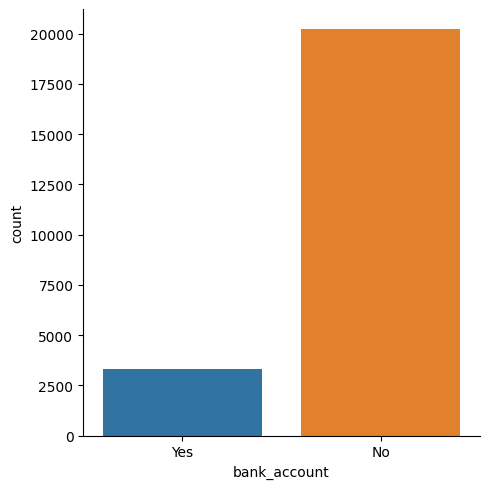

In [9]:
# explorons la distribution de la target
sns.catplot(data=train_set, x="bank_account", kind="count")
plt.show()

Compréhension des diffiérentes variables

In [10]:
variables_definitions = pd.read_csv('data/VariableDefinitions.csv') # schema de definition des variables
variables_definitions

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 2. Pré-traitement

Importation des modules de pre-processing

In [11]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # pour l'encodage des variables
from sklearn.preprocessing import MinMaxScaler, StandardScaler # pour la normalisation des variables

Fonction réalisant le pré-traitement de notre dataset

In [12]:
def preprocessing_data(data: pd.DataFrame) -> pd.DataFrame:
    ''' Réalise la phase de pré-traitement d'un dataset à savoir l'encodage 
    des variables discrètes et la normalisation de toutes les variables 
    '''
    # copie du dataset
    data1 = data.copy()
    # suppression de la variable d'identifiants uniques
    data1.drop('uniqueid', axis=1, inplace=True)
    # la liste des colonnes discrètes
    object_columns = list(data1.select_dtypes(include='object').columns)
    # la liste des colonnes continues
    number_columns = list(data1.select_dtypes(include='number').columns)
    # encodage des variables discrètes
    encoder = OrdinalEncoder()
    data1[object_columns] = encoder.fit_transform(data1[object_columns])
    # normalisation
    scaler = MinMaxScaler()
    data1[data1.columns] = scaler.fit_transform(data1)
    return data1

In [13]:
processed_train = preprocessing_data(train_set)
processed_test = preprocessing_data(test_set)
# processed_test.head(3)

Séparation des features et de la target

In [14]:
X_train = processed_train.drop(['bank_account'], axis=1)
y_train = processed_train['bank_account']
X_train

,country,year,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0.0,1.0,0.0,1.0,0.10,0.095238,0.0,1.0,0.50,0.6,1.000000
1,0.0,1.0,0.0,0.0,0.20,0.642857,0.0,0.2,1.00,0.0,0.444444
2,0.0,1.0,1.0,1.0,0.20,0.119048,1.0,0.6,0.75,1.0,1.000000
3,0.0,1.0,0.0,1.0,0.20,0.214286,0.0,0.2,0.50,0.4,0.333333
4,0.0,1.0,1.0,0.0,0.35,0.119048,1.0,0.0,0.75,0.4,0.555556
...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,1.0,0.0,1.0,0.15,0.380952,0.0,0.2,0.00,0.0,0.777778
23520,1.0,1.0,0.0,1.0,0.05,0.130952,0.0,0.2,0.75,0.6,0.777778
23521,1.0,1.0,0.0,1.0,0.20,0.130952,0.0,0.8,1.00,0.4,0.777778
23522,1.0,1.0,1.0,1.0,0.30,0.166667,0.0,0.8,0.00,0.6,1.000000


Matrice de corrélation de toutes les variables

<AxesSubplot: title={'center': 'Corrélation des features'}>

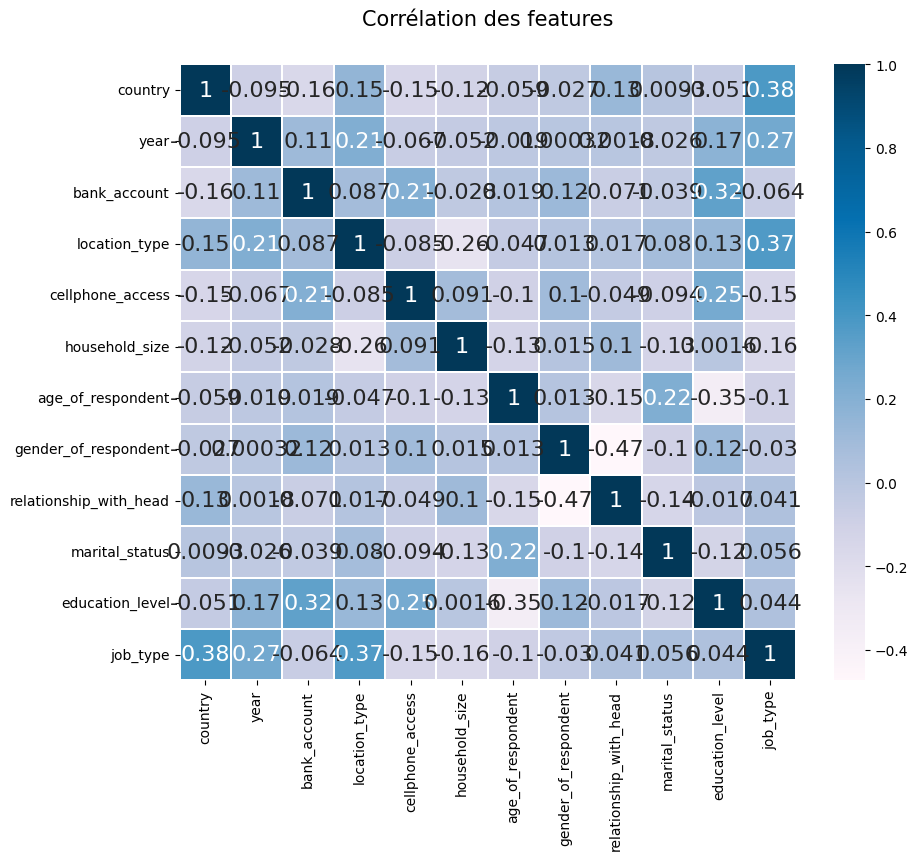

In [15]:
plt.figure(figsize=(10, 8))
plt.title("Corrélation des features", y=1.05, size=15)
sns.heatmap(processed_train.corr(), linewidths=0.1, vmax=1.0,
            square=True, cmap=plt.cm.PuBu, linecolor="white", annot=True, annot_kws={"size": 16})

## 3. Modélisation

Importation des modules de modélisation

In [33]:
#Machine Learning
## model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
## tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
# metrics
from sklearn.metrics import accuracy_score

### 3.1. Choix du meilleur modèle

In [17]:
X_Train, X_Val, y_Train, y_Val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.1)

Entraînement de plusieurs modèles

In [36]:
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
svc = SVC()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5)

classifiers_list = [knn, rfc, svc, gbc, xgb]

In [37]:
scores_models = {}
for model in classifiers_list:
    model.fit(X_Train, y_Train)
    y_model = model.predict(X_Val)
    metrique = 1 - accuracy_score(y_Val, y_model)
    scores_models[str(model)] = metrique
    print(f"Taux d'erreur du {str(model)} : {metrique}")

Taux d'erreur du KNeighborsClassifier() : 0.12919677008074804
Taux d'erreur du DecisionTreeClassifier() : 0.16149596260093502
Taux d'erreur du RandomForestClassifier() : 0.13599660008499792
Taux d'erreur du GaussianNB() : 0.16107097322566932
Taux d'erreur du SVC() : 0.12239694007649804
Taux d'erreur du GradientBoostingClassifier() : 0.11049723756906082
Taux d'erreur du XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
        

In [20]:
min(scores_models.values())

0.11049723756906082

Le meilleur modèle parmi les modèles précédents est donc le GBC.

Matrice de confusion

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

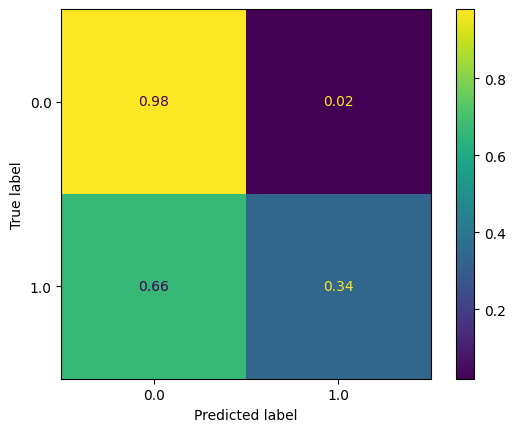

In [22]:
# traçons la matrice de confusion pour le GBC
ConfusionMatrixDisplay.from_estimator(gbc, X_Val, y_Val, normalize='true')
plt.show()

Cette matrice montre que notre modèle reconnaît mieux les vrais négatifs (l'individu n'a pas de compte bancaire) par rapport aux vrais positifs (l'individu a un compte bancaire). Cela était prévisible car il y a 6 fois plus de négatifs que de positifs dans le dataset.

### 3.3. Optimisation avec GridSearchCV

Soit la liste des hyperparamètres valides pour l'estimateur GradientBoostingClassifier() : ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start']

In [23]:
params_grid: dict[str, tuple] = {
    'random_state': (0, 10, 20, 30),
    'n_estimators': (10, 20, 30),
    'max_depth': (3, 5, 8),
    'min_samples_leaf': (4, 6, 8),
    'min_samples_split': (4, 8)
}
grid_cv = GridSearchCV(gbc, params_grid, n_jobs=-1, verbose=2, cv=3)
grid_cv.fit(X_Train, y_Train)
print(grid_cv.best_params_)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 30, 'random_state': 0}


In [24]:
optimized_gbc = GradientBoostingClassifier(
    max_depth=grid_cv.best_params_['max_depth'], 
	min_samples_leaf=grid_cv.best_params_['min_samples_leaf'], 
	min_samples_split=grid_cv.best_params_['min_samples_split'], 
	n_estimators=grid_cv.best_params_['n_estimators'], 
	random_state=grid_cv.best_params_['random_state']
)

optimized_gbc.fit(X_Train, y_Train)
y_pred = optimized_gbc.predict(X_Val)

print("Taux d'erreur de GradientBoostingClassifier : ", 1 - accuracy_score(y_Val, y_pred))

Taux d'erreur de GradientBoostingClassifier :  0.10922226944326396


Bon, apparemment les nouveaux hyperparamètres trouvés n'ont pas amélioré le score initial. -_-

Après avoir choisi un modèle, réalisons maintenant les prédictions sur notre ensemble de test.

In [ ]:
# processed_test.drop(['bank_account'], axis=1, inplace=True)

In [26]:
test_set['bank_account'] = gbc.predict(processed_test)

In [27]:
test_set.head(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government,1.0
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private,1.0
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent,0.0
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent,0.0
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent,0.0


## 4. Soumission

Visualisation du fichier de soumission

In [28]:
sample_submission = pd.read_csv('samples/SampleSubmission.csv') # exemple de soumission

In [29]:
sample_submission.sample(5)

,unique_id,bank_account
31623,uniqueid_1016 x Uganda,0
7534,uniqueid_7535 x Kenya,0
5375,uniqueid_5376 x Kenya,0
16704,uniqueid_8036 x Rwanda,0
12996,uniqueid_4328 x Rwanda,0


Création de notre fichier de soumission

In [30]:
test_set.sample(5)

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,bank_account
6319,Rwanda,2016,uniqueid_12454,Rural,No,4,37,Female,Spouse,Married/Living together,No formal education,Informally employed,0.0
7508,Tanzania,2017,uniqueid_7783,Urban,No,2,32,Male,Head of Household,Single/Never Married,No formal education,Self employed,0.0
4263,Rwanda,2016,uniqueid_10398,Rural,Yes,2,76,Female,Spouse,Married/Living together,No formal education,Farming and Fishing,0.0
904,Kenya,2018,uniqueid_6973,Rural,Yes,6,33,Female,Spouse,Married/Living together,Primary education,Farming and Fishing,0.0
229,Kenya,2018,uniqueid_6298,Urban,Yes,4,20,Female,Other relative,Single/Never Married,Vocational/Specialised training,Formally employed Private,0.0


In [31]:
from datetime import datetime as dt

soumissions = pd.DataFrame(
    {"unique_id": test_set["uniqueid"] + " x " + test_set["country"], "bank_account": test_set['bank_account'].astype(int)})
soumissions.to_csv(
    f'soumission-{dt.now().strftime(format="%d-%m-%Y")}.csv', index=False)

In [32]:
soumissions.sample(5)

,unique_id,bank_account
6594,uniqueid_6869 x Tanzania,0
7488,uniqueid_7763 x Tanzania,0
5320,uniqueid_11455 x Rwanda,0
5268,uniqueid_11403 x Rwanda,0
1308,uniqueid_7377 x Kenya,0
